<a href="https://colab.research.google.com/github/PavaniMaganti/Smart-Irrigation-System/blob/main/AI_with_iot_smart_irrigation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Dataset Smart Irrigation Systems in Agriculture.csv')
print(df.head())

   id  temperature  pressure altitude  soilmiosture  note  status     class  \
0   1        29.10   9984.53   12.21-           377     0       0  Very Dry   
1   2        29.08   9984.36   12.22-           379     0       0  Very Dry   
2   3        29.06   9984.56   12.20-           376     0       0  Very Dry   
3   4        29.05   9984.39   12.22-           377     0       0  Very Dry   
4   5        29.03   9984.42   12.21-           379     0       0  Very Dry   

         date      time  
0  08/10/2022  22:06:24  
1  08/10/2022  22:06:24  
2  08/10/2022  22:06:24  
3  08/10/2022  22:06:24  
4  08/10/2022  22:06:24  


In [ ]:
columns_to_drop = ['id', 'time', 'date']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temperature   4688 non-null   float64
 1   pressure      4688 non-null   float64
 2   altitude      4688 non-null   object 
 3   soilmiosture  4688 non-null   int64  
 4   note          4688 non-null   int64  
 5   status        4688 non-null   int64  
 6   class         4688 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 256.5+ KB


In [ ]:
df.describe()

,temperature,pressure,soilmiosture,note,status
count,4688.000000,4688.000000,4688.000000,4688.000000,4688.000000
mean,29.599089,9963.153215,243.692406,1.878413,0.703712
std,5.842685,1383.602527,76.176855,1.152977,0.456668
min,27.970000,-2120.400000,-243.000000,0.000000,0.000000
25%,28.630000,9935.255000,171.000000,1.000000,0.000000
50%,29.180000,9969.535000,233.000000,2.000000,1.000000
75%,29.990000,9975.700000,326.000000,3.000000,1.000000
max,178.700000,99931.100000,480.000000,3.000000,1.000000


In [ ]:
if 'altitude' in df.columns:
    # Ensure consistent formatting of altitude values
    df['altitude'] = df['altitude'].astype(str).str.replace(r'(\d+\.\d+)-', r'-\1', regex=True)

# Display the first few rows of the updated 'altitude' column
print(df[['altitude']].head())

  altitude
0   -12.21
1   -12.22
2   -12.20
3   -12.22
4   -12.21


In [ ]:
df.head()

,temperature,pressure,altitude,soilmiosture,note,status,class
0,29.10,9984.53,-12.21,377,0,0,Very Dry
1,29.08,9984.36,-12.22,379,0,0,Very Dry
2,29.06,9984.56,-12.20,376,0,0,Very Dry
3,29.05,9984.39,-12.22,377,0,0,Very Dry
4,29.03,9984.42,-12.21,379,0,0,Very Dry


In [ ]:
columns_to_drop = ['note', 'status']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
df.head()

,temperature,pressure,altitude,soilmiosture,class
0,29.10,9984.53,-12.21,377,Very Dry
1,29.08,9984.36,-12.22,379,Very Dry
2,29.06,9984.56,-12.20,376,Very Dry
3,29.05,9984.39,-12.22,377,Very Dry
4,29.03,9984.42,-12.21,379,Very Dry


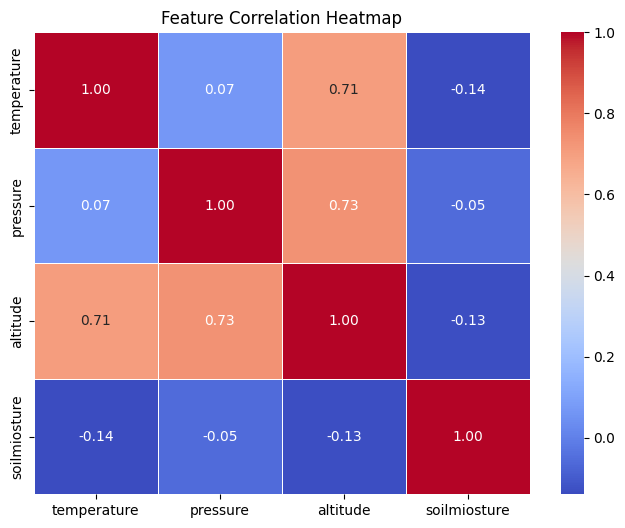

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Ensure numeric columns
# Convert non-numeric values to NaN, then drop or fill them
df_cleaned = df.copy()
for col in df_cleaned.columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Step 2: Drop columns with no numeric data or all NaN
df_cleaned = df_cleaned.dropna(axis=1, how='all')  # Drop columns with all NaN

# Step 3: Compute and plot the correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df_cleaned.corr()  # Compute correlations only on numeric columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Feature roles
feature_roles = {
    "temperature": "Sensor data representing ambient temperature",
    "pressure": "Sensor data representing atmospheric pressure",
    "altitude": "Derived data representing elevation in meters",
    "soilmoisture": "Sensor data representing soil moisture levels",
    "note": "Text data for recording system notes",
    "status": "Categorical data indicating system status (Active/Idle)",
    "class": "Target variable for classification (1: Active, 0: Idle)",
    "date": "Timestamp for logging data (date)",
    "time": "Timestamp for logging data (time)",
}

# Print each feature and its role
print("Feature Roles:")
for feature, role in feature_roles.items():
    print(f"- {feature}: {role}")


Feature Roles:
- temperature: Sensor data representing ambient temperature
- pressure: Sensor data representing atmospheric pressure
- altitude: Derived data representing elevation in meters
- soilmoisture: Sensor data representing soil moisture levels
- note: Text data for recording system notes
- status: Categorical data indicating system status (Active/Idle)
- class: Target variable for classification (1: Active, 0: Idle)
- date: Timestamp for logging data (date)
- time: Timestamp for logging data (time)


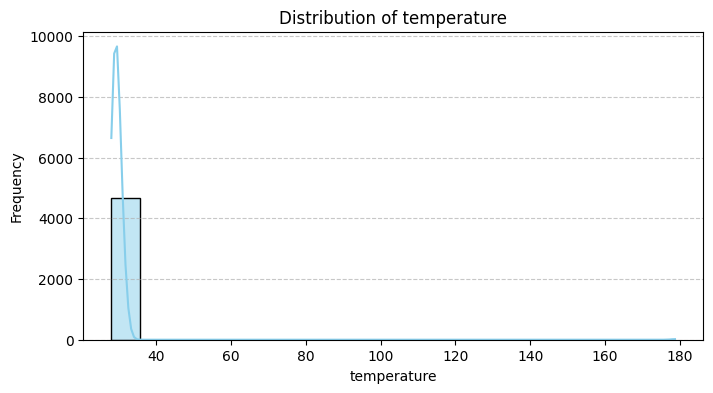

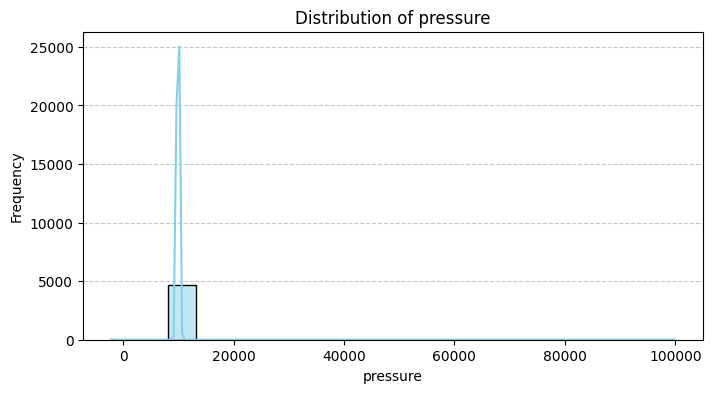

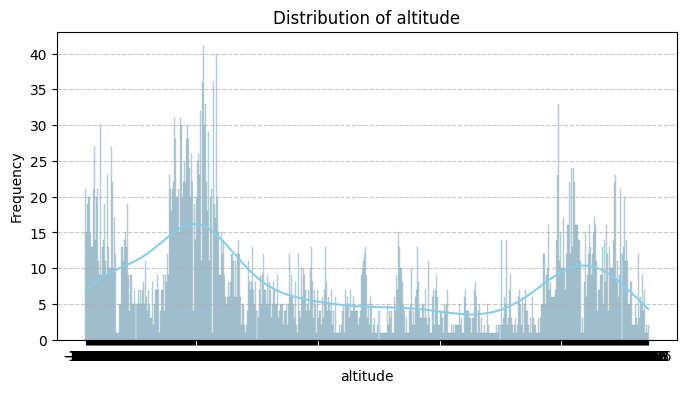

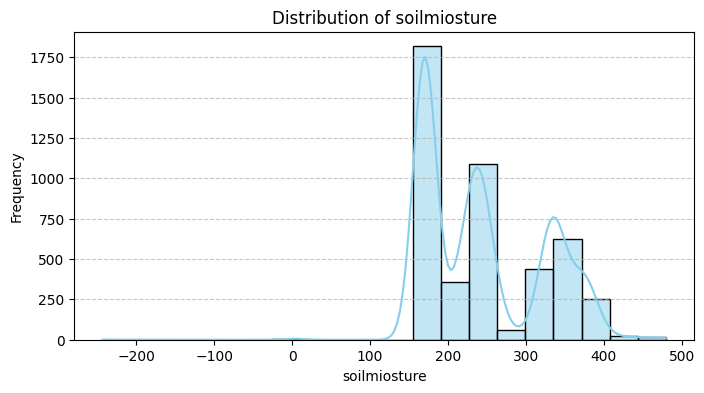

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize numerical features
numerical_features = ["temperature", "pressure", "altitude", "soilmiosture"]
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=20, color="skyblue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


In [ ]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Handle missing values dynamically
for col in df.columns:
    if df[col].isnull().sum() > 0:  # Only handle columns with missing values
        if df[col].dtype in ["float64", "int64"]:  # Numeric
            if abs(df[col].skew()) < 0.5:  # Low skewness
                df[col].fillna(df[col].mean(), inplace=True)
            else:  # High skewness
                df[col].fillna(df[col].median(), inplace=True)
        else:  # Categorical
            df[col].fillna(df[col].mode()[0], inplace=True)

# Verify missing values are handled
print("\nMissing Values After Handling:")
print(df.isnull().sum())



Missing Values in Each Column:
temperature     0
pressure        0
altitude        0
soilmiosture    0
class           0
dtype: int64

Missing Values After Handling:
temperature     0
pressure        0
altitude        0
soilmiosture    0
class           0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# List of numerical features
numerical_features = ["temperature", "pressure", "altitude", "soilmiosture"]

# Step 1: Identify and Convert Non-Numeric Values
for col in numerical_features:
    df[col] = pd.to_numeric(df[col], errors="coerce")  # Convert non-numeric values to NaN

# Step 2: Fill Missing Values (NaN) with Mean
for col in numerical_features:
    df[col].fillna(df[col].mean(), inplace=True)

# Step 3: Apply MinMaxScaler to Normalize Features
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the scaled features
print("\nScaled Features:")
print(df[numerical_features].head())



Scaled Features:
   temperature  pressure  altitude  soilmiosture
0     0.007497  0.118616  0.040205      0.857538
1     0.007364  0.118614  0.040131      0.860304
2     0.007231  0.118616  0.040280      0.856155
3     0.007165  0.118615  0.040131      0.857538
4     0.007032  0.118615  0.040205      0.860304


<ipython-input-14-da3f80f06f33>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


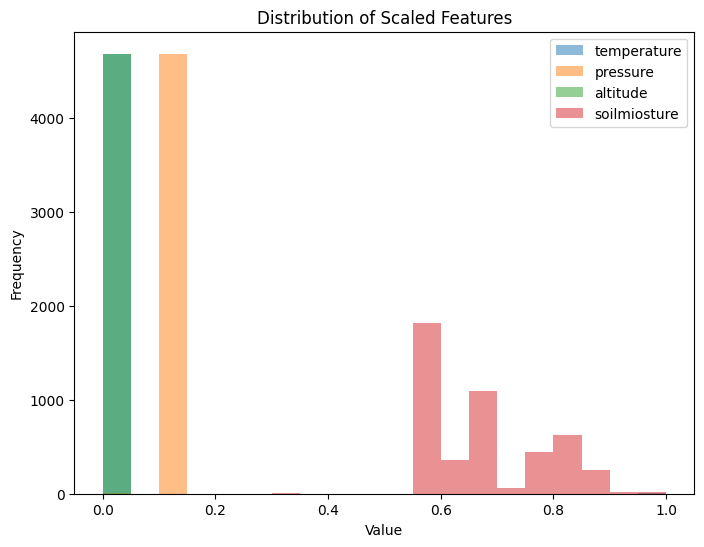

In [ ]:
# Define the features to scale
features_to_scale = ['temperature', 'pressure', 'altitude', 'soilmiosture']  # Replace with actual column names from your dataset

# Histogram to visualize the distribution of scaled features
plt.figure(figsize=(8, 6))
for feature in features_to_scale:
    plt.hist(df[feature], bins=20, alpha=0.5, label=feature)
plt.title("Distribution of Scaled Features")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=["class"])  # Exclude the target variable
y = df["class"]

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("\nTraining Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)



Training Set Size: (3750, 4)
Testing Set Size: (938, 4)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Identify and Handle Non-Numeric Columns
non_numeric_columns = df.select_dtypes(exclude=["number"]).columns
print("Non-Numeric Columns:", non_numeric_columns)

# Convert categorical columns to numeric using LabelEncoder
label_encoders = {}
for col in non_numeric_columns:
    if col == "date":  # Handle date column
        df["date_numeric"] = pd.to_datetime(df["date"], errors="coerce").dt.dayofyear
        df.drop(columns=["date"], inplace=True)
    else:  # Convert categorical columns
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])

# Display current columns in the dataset
print("Current Columns in Dataset:\n", df.columns)

# Define Features (X) and Target (y)
# Drop only existing columns
X = df.drop(columns=["class"], errors="ignore")  # Drop target column only
y = df["class"]

# Verify the features and target
print("\nFeatures (X):\n", X.head())
print("\nTarget (y):\n", y.head())

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 4: Train the Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 5: Predict and Evaluate
y_pred = dt_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nDecision Tree Accuracy: {accuracy:.2f}")

# Precision, Recall, F1-Score (macro average)
precision = precision_score(y_test, y_pred, average="macro", zero_division=0)
recall = recall_score(y_test, y_pred, average="macro", zero_division=0)
f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)

print(f"\nPrecision (Macro Avg): {precision:.2f}")
print(f"Recall (Macro Avg): {recall:.2f}")
print(f"F1 Score (Macro Avg): {f1:.2f}")



Non-Numeric Columns: Index(['class'], dtype='object')
Current Columns in Dataset:
 Index(['temperature', 'pressure', 'altitude', 'soilmiosture', 'class'], dtype='object')

Features (X):
    temperature  pressure  altitude  soilmiosture
0     0.007497  0.118616  0.040205      0.857538
1     0.007364  0.118614  0.040131      0.860304
2     0.007231  0.118616  0.040280      0.856155
3     0.007165  0.118615  0.040131      0.857538
4     0.007032  0.118615  0.040205      0.860304

Target (y):
 0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

Decision Tree Accuracy: 1.00

Precision (Macro Avg): 1.00
Recall (Macro Avg): 1.00
F1 Score (Macro Avg): 1.00


In [ ]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00       205
           2       1.00      1.00      1.00       369
           3       1.00      1.00      1.00       291

    accuracy                           1.00       938
   macro avg       1.00      1.00      1.00       938
weighted avg       1.00      1.00      1.00       938



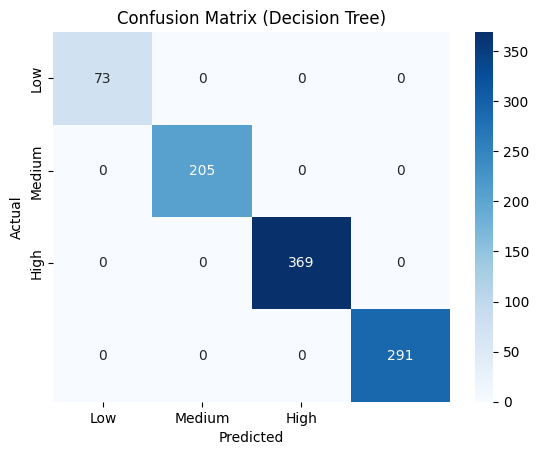

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


=== Decision Tree ===

Accuracy: 1.00
Precision (Macro Avg): 1.00
Recall (Macro Avg): 1.00
F1 Score (Macro Avg): 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00       205
           2       1.00      1.00      1.00       369
           3       1.00      1.00      1.00       291

    accuracy                           1.00       938
   macro avg       1.00      1.00      1.00       938
weighted avg       1.00      1.00      1.00       938



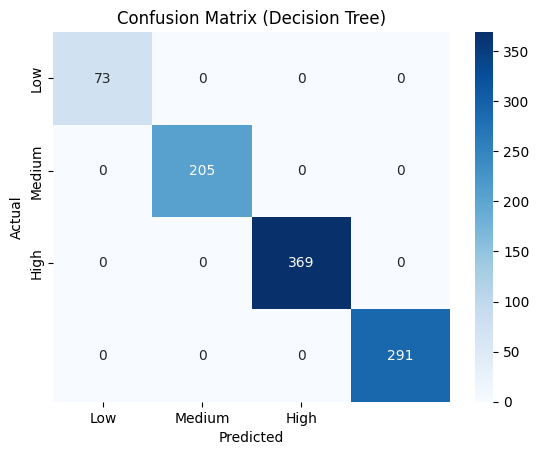


=== SVM ===

Accuracy: 0.92
Precision (Macro Avg): 0.68
Recall (Macro Avg): 0.75
F1 Score (Macro Avg): 0.71

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.75      1.00      0.86       205
           2       1.00      1.00      1.00       369
           3       0.98      1.00      0.99       291

    accuracy                           0.92       938
   macro avg       0.68      0.75      0.71       938
weighted avg       0.86      0.92      0.89       938



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


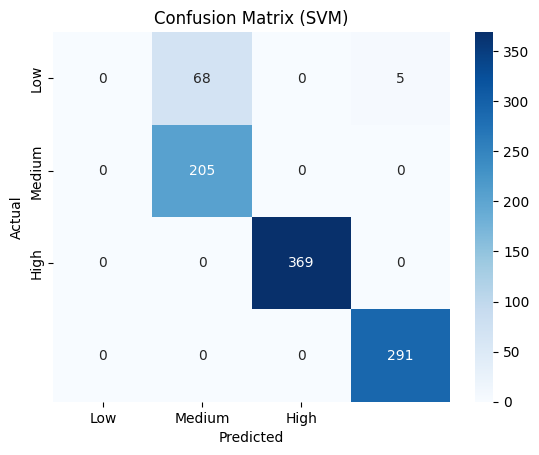


=== Random Forest ===

Accuracy: 1.00
Precision (Macro Avg): 1.00
Recall (Macro Avg): 1.00
F1 Score (Macro Avg): 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00       205
           2       1.00      1.00      1.00       369
           3       1.00      1.00      1.00       291

    accuracy                           1.00       938
   macro avg       1.00      1.00      1.00       938
weighted avg       1.00      1.00      1.00       938



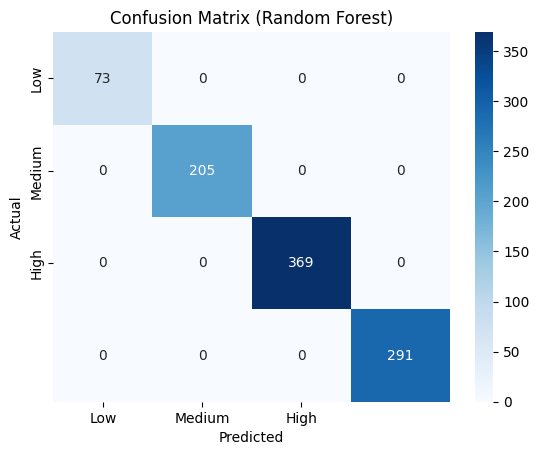


=== Logistic Regression ===

Accuracy: 0.91
Precision (Macro Avg): 0.67
Recall (Macro Avg): 0.74
F1 Score (Macro Avg): 0.70

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.75      1.00      0.86       205
           2       0.96      1.00      0.98       369
           3       0.98      0.95      0.96       291

    accuracy                           0.91       938
   macro avg       0.67      0.74      0.70       938
weighted avg       0.85      0.91      0.87       938



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


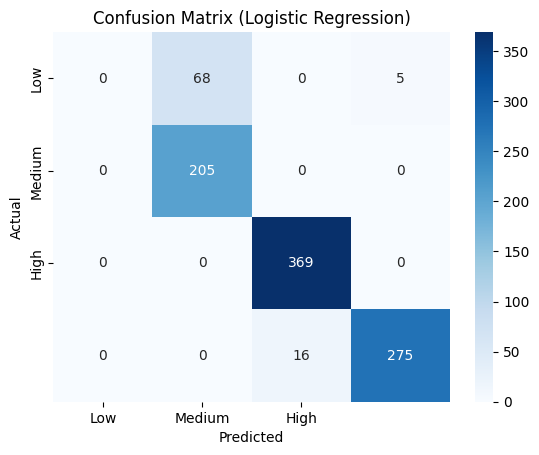


=== K-Nearest Neighbors ===

Accuracy: 0.99
Precision (Macro Avg): 0.99
Recall (Macro Avg): 0.99
F1 Score (Macro Avg): 0.99

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        73
           1       1.00      0.98      0.99       205
           2       1.00      1.00      1.00       369
           3       1.00      1.00      1.00       291

    accuracy                           0.99       938
   macro avg       0.99      0.99      0.99       938
weighted avg       0.99      0.99      0.99       938



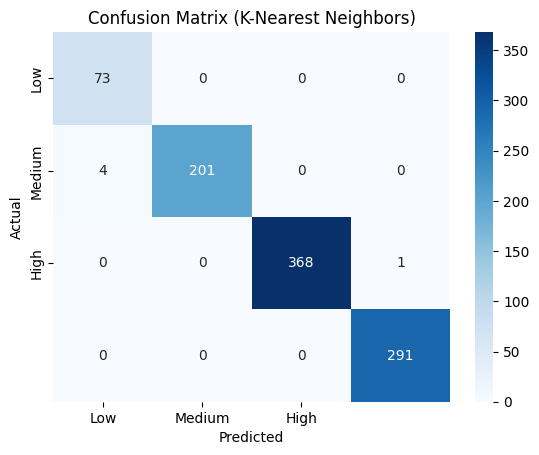

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to train and evaluate models
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    print(f"\n=== {model_name} ===")
    # Train the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro", zero_division=0)
    recall = recall_score(y_test, y_pred, average="macro", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)

    print(f"\nAccuracy: {accuracy:.2f}")
    print(f"Precision (Macro Avg): {precision:.2f}")
    print(f"Recall (Macro Avg): {recall:.2f}")
    print(f"F1 Score (Macro Avg): {f1:.2f}")

    # Classification Report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
    plt.title(f"Confusion Matrix ({model_name})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel="linear", random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Evaluate each model
for model_name, model in models.items():
    train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5849 - loss: 1.0925 - val_accuracy: 0.8200 - val_loss: 0.5332
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8416 - loss: 0.5110 - val_accuracy: 0.8840 - val_loss: 0.3065
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8891 - loss: 0.3304 - val_accuracy: 0.9253 - val_loss: 0.2089
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9132 - loss: 0.2429 - val_accuracy: 0.9253 - val_loss: 0.1667
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9082 - loss: 0.2122 - val_accuracy: 0.9187 - val_loss: 0.1488
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9290 - loss: 0.1881 - val_accuracy: 0.9387 - val_loss: 0.1343
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9304 - loss: 0.1632 - val_accuracy: 0.9467 - val_loss: 0.1233
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9373 - loss: 0.1482 - val_accuracy: 0.9573 - val_loss: 0.1139
Epo

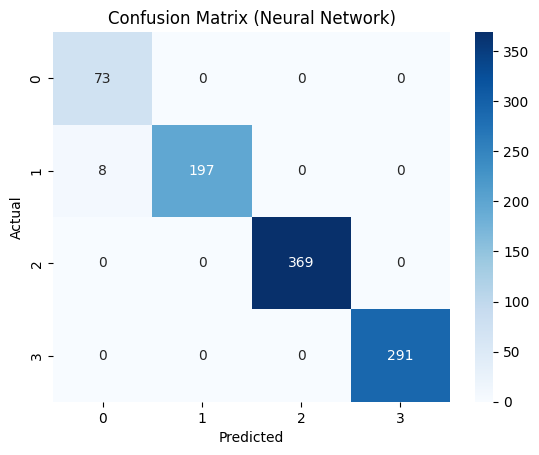


Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        73
           1       1.00      0.96      0.98       205
           2       1.00      1.00      1.00       369
           3       1.00      1.00      1.00       291

    accuracy                           0.99       938
   macro avg       0.98      0.99      0.98       938
weighted avg       0.99      0.99      0.99       938



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Step 1: Preprocess the data (Ensure non-numeric columns are handled as shown in your code)
non_numeric_columns = df.select_dtypes(exclude=["number"]).columns
label_encoders = {}

for col in non_numeric_columns:
    if col == "date":
        df["date_numeric"] = pd.to_datetime(df["date"], errors="coerce").dt.dayofyear
        df.drop(columns=["date"], inplace=True)
    else:
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])

# Define Features (X) and Target (y)
X = df.drop(columns=["class"], errors="ignore")
y = df["class"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, stratify=y_categorical, random_state=42)
# Step 2: Define the Neural Network Architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_categorical.shape[1], activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Step 3: Train the Neural Network
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
# Step 4: Evaluate the Model
eval_results = model.evaluate(X_test, y_test, verbose=0)
print(f"\nNeural Network Accuracy: {eval_results[1]:.2f}")
# Step 5: Predict and Metrics
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_actual = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test_actual, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (Neural Network)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Fix for Classification Report target_names issue
if isinstance(label_encoder.classes_[0], (int, np.integer)):
    target_names = [str(cls) for cls in label_encoder.classes_]
else:
    target_names = label_encoder.classes_

# Classification Report
print("\nClassification Report:\n", classification_report(y_test_actual, y_pred, target_names=target_names))


In [ ]:
import matplotlib.pyplot as plt

# Dictionary to store model accuracies
model_accuracies = {}

# Collect accuracy for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color="skyblue")
plt.title("Model Accuracies")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.xticks(rotation=45)
plt.show()


ValueError: y should be a 1d array, got an array of shape (3750, 4) instead.

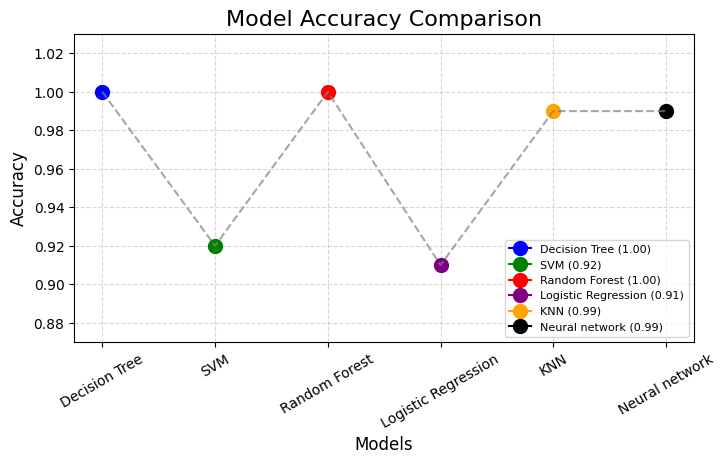

In [ ]:
import matplotlib.pyplot as plt

# Example model names and accuracies
model_names = ["Decision Tree", "SVM", "Random Forest", "Logistic Regression", "KNN","Neural network"]
accuracies = [1.00,0.92, 1.00, 0.91, 0.99,0.99]  # Replace with actual accuracy values

# Create the plot
plt.figure(figsize=(8, 4))
colors = ['blue', 'green', 'red', 'purple', 'orange','black']  # Different colors for each model
for i, model in enumerate(model_names):
    plt.plot(i + 1, accuracies[i], marker='o', color=colors[i], markersize=10, label=f"{model} ({accuracies[i]:.2f})")

# Connect the dots with a smooth line
plt.plot(range(1, len(model_names) + 1), accuracies, linestyle='--', color='gray', linewidth=1.5, alpha=0.7)

# Customize the graph
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(range(1, len(model_names) + 1), model_names, fontsize=10, rotation=30)
plt.ylim(0.87, 1.03)  # Ensure clear Y-axis
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend(loc="lower right", fontsize=8)
plt.show()


In [ ]:
#from sklearn.model_selection import GridSearchCV

In [ ]:

'''# Dictionary to store best parameters and scores
best_params = {}
best_scores = {}

# 1. Decision Tree Hyperparameter Tuning
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy', verbose=1)
dt_grid.fit(X_train, y_train)
best_params['Decision Tree'] = dt_grid.best_params_
best_scores['Decision Tree'] = dt_grid.best_score_'''


In [ ]:
'''# 2. Random Forest Hyperparameter Tuning
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', verbose=1)
rf_grid.fit(X_train, y_train)
best_params['Random Forest'] = rf_grid.best_params_
best_scores['Random Forest'] = rf_grid.best_score_'''



In [ ]:
'''# 3. SVM Hyperparameter Tuning
svm_params = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(SVC(random_state=42), svm_params, cv=5, scoring='accuracy', verbose=1)
svm_grid.fit(X_train, y_train)
best_params['SVM'] = svm_grid.best_params_
best_scores['SVM'] = svm_grid.best_score_'''



In [ ]:
'''# 4. Logistic Regression Hyperparameter Tuning
lr_params = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 500]
}
lr_grid = GridSearchCV(LogisticRegression(random_state=42), lr_params, cv=5, scoring='accuracy', verbose=1)
lr_grid.fit(X_train, y_train)
best_params['Logistic Regression'] = lr_grid.best_params_
best_scores['Logistic Regression'] = lr_grid.best_score_'''



In [ ]:
'''# 5. K-Nearest Neighbors Hyperparameter Tuning
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy', verbose=1)
knn_grid.fit(X_train, y_train)
best_params['KNN'] = knn_grid.best_params_
best_scores['KNN'] = knn_grid.best_score_

# Display best parameters and scores
print("Best Parameters:\n", best_params)
print("\nBest Scores:\n", best_scores)'''

In [ ]:
'''import matplotlib.pyplot as plt

# Visualization of Hyperparameter Tuning Results

# Example data: Replace with your actual GridSearchCV results
# Extract `cv_results_` from GridSearchCV objects
dt_results = dt_grid.cv_results_  # Decision Tree
rf_results = rf_grid.cv_results_  # Random Forest
svm_results = svm_grid.cv_results_  # SVM
lr_results = lr_grid.cv_results_  # Logistic Regression
knn_results = knn_grid.cv_results_  # KNN

# Plot the hyperparameter tuning results for Decision Tree
plt.figure(figsize=(10, 6))
plt.plot(dt_results['mean_test_score'], label="Decision Tree", marker='o', color='blue')

# Plot the hyperparameter tuning results for Random Forest
plt.plot(rf_results['mean_test_score'], label="Random Forest", marker='s', color='green')

# Plot the hyperparameter tuning results for SVM
plt.plot(svm_results['mean_test_score'], label="SVM", marker='^', color='red')

# Plot the hyperparameter tuning results for Logistic Regression
plt.plot(lr_results['mean_test_score'], label="Logistic Regression", marker='d', color='purple')

# Plot the hyperparameter tuning results for KNN
plt.plot(knn_results['mean_test_score'], label="KNN", marker='x', color='orange')

# Customize the plot
plt.title("Hyperparameter Tuning Results", fontsize=16)
plt.xlabel("Hyperparameter Configurations (Index)", fontsize=12)
plt.ylabel("Cross-Validated Accuracy", fontsize=12)
plt.legend(title="Models", fontsize=10)
plt.grid(alpha=0.5, linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()'''
